In [1]:
import os as os
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import datetime as dt
plt.style.use('seaborn-whitegrid')

plt.rcParams['image.cmap'] = 'blue'

#sns.set_context('notebook',font_scale=2)
sns.set_style("whitegrid")
% matplotlib inline
plt.rcParams['font.size'] = 22
plt.rcParams.update({'figure.figsize': (20,10)})
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})
# mpl.rcParams.keys()

In [2]:
!cd data && ls

2014-05 - Citi Bike trip data.csv  taxi_tree_test_X.csv
bike_oneweekfrom20140505.csv	   taxi_tree_test_Xy_20130506-12.csv
data_jan13.csv			   taxi_tree_test_Xy.csv
README.txt			   taxi_tree_test_Xy_sample.csv
taxi_oneweekfrom20130107.csv	   taxi_tree_test_y_20130506-12.csv
taxi_oneweekfrom20130506.csv	   taxi_tree_test_y.csv
taxi_oneweekfrom20140505.csv	   yellow_tripdata_2013-05.csv
taxi_tree_test_X_20130506-12.csv   yellow_tripdata_2014-05.csv


Use the bash =)

In [3]:
data = pd.read_csv('data/bike_oneweekfrom20140505.csv', index_col=0, parse_dates=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185744 entries, 0 to 185743
Data columns (total 15 columns):
tripduration               185744 non-null int64
starttime                  185744 non-null object
stoptime                   185744 non-null object
start station id           185744 non-null int64
start station name         185744 non-null object
start station latitude     185744 non-null float64
start station longitude    185744 non-null float64
end station id             185744 non-null int64
end station name           185744 non-null object
end station latitude       185744 non-null float64
end station longitude      185744 non-null float64
bikeid                     185744 non-null int64
usertype                   185744 non-null object
birth year                 185744 non-null object
gender                     185744 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 22.7+ MB


So parsing doe not work, do it manually:

In [5]:
data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
new_column_names = ['trip_time', 'pickup_datetime', 'dropoff_datetime', 'start_station_id',
       'start_station_name', 'pickup_latitude',
       'pickup_longitude', 'end_station_id', 'end_station_name',
       'dropoff_latitude', 'dropoff_longitude', 'bikeid', 'usertype',
       'birth year', 'gender']

In [7]:
data.columns = new_column_names

In [8]:
data.describe()

,trip_time,start_station_id,pickup_latitude,pickup_longitude,end_station_id,dropoff_latitude,dropoff_longitude,bikeid,gender
count,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000
mean,869.523107,450.726511,40.734630,-73.991079,451.404142,40.734387,-73.991147,18157.530305,1.090598
std,974.098663,370.232259,0.019489,0.012186,375.448276,0.019530,0.012298,2119.989210,0.550519
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,401.000000,304.000000,40.721655,-73.999947,303.000000,40.721101,-74.000040,16315.000000,1.000000
50%,640.000000,405.000000,40.736494,-73.990765,404.000000,40.736197,-73.990931,18164.000000,1.000000
75%,1059.000000,490.000000,40.750073,-73.982050,489.000000,40.749718,-73.982050,20005.000000,1.000000
max,21549.000000,3002.000000,40.771522,-73.953809,3002.000000,40.771522,-73.953809,21679.000000,2.000000


In [9]:
data['pickup_datetime'] =pd.to_datetime(data['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] =pd.to_datetime(data['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
data['trip_time'] = pd.to_timedelta(data['trip_time'], 's')

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trip_time,185744,0 days 00:14:29.523107,0 days 00:16:14.098662,0 days 00:01:00,0 days 00:06:41,0 days 00:10:40,0 days 00:17:39,0 days 05:59:09
start_station_id,185744,450.727,370.232,72,304,405,490,3002
pickup_latitude,185744,40.7346,0.0194894,40.6803,40.7217,40.7365,40.7501,40.7715
pickup_longitude,185744,-73.9911,0.012186,-74.0171,-73.9999,-73.9908,-73.9821,-73.9538
end_station_id,185744,451.404,375.448,72,303,404,489,3002
dropoff_latitude,185744,40.7344,0.0195297,40.6803,40.7211,40.7362,40.7497,40.7715
dropoff_longitude,185744,-73.9911,0.0122976,-74.0171,-74,-73.9909,-73.9821,-73.9538
bikeid,185744,18157.5,2119.99,14529,16315,18164,20005,21679
gender,185744,1.0906,0.550519,0,1,1,1,2


In [11]:
data.head()

,trip_time,pickup_datetime,dropoff_datetime,start_station_id,start_station_name,pickup_latitude,pickup_longitude,end_station_id,end_station_name,dropoff_latitude,dropoff_longitude,bikeid,usertype,birth year,gender
0,00:04:49,2014-05-05 00:00:14,2014-05-05 00:05:03,495,W 47 St & 10 Ave,40.762699,-73.993012,469,Broadway & W 53 St,40.763441,-73.982681,17039,Subscriber,1986,1
1,00:17:31,2014-05-05 00:00:19,2014-05-05 00:17:50,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,236,St Marks Pl & 2 Ave,40.728419,-73.987140,17875,Subscriber,1985,1
2,00:03:57,2014-05-05 00:01:05,2014-05-05 00:05:02,309,Murray St & West St,40.714979,-74.013012,3002,South End Ave & Liberty St,40.711512,-74.015756,18008,Customer,\N,0
3,00:08:54,2014-05-05 00:01:12,2014-05-05 00:10:06,151,Cleveland Pl & Spring St,40.721816,-73.997203,345,W 13 St & 6 Ave,40.736494,-73.997044,18237,Subscriber,1983,1
4,00:04:35,2014-05-05 00:01:16,2014-05-05 00:05:51,173,Broadway & W 49 St,40.760647,-73.984427,449,W 52 St & 9 Ave,40.764618,-73.987895,16607,Subscriber,1985,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185744 entries, 0 to 185743
Data columns (total 15 columns):
trip_time             185744 non-null timedelta64[ns]
pickup_datetime       185744 non-null datetime64[ns]
dropoff_datetime      185744 non-null datetime64[ns]
start_station_id      185744 non-null int64
start_station_name    185744 non-null object
pickup_latitude       185744 non-null float64
pickup_longitude      185744 non-null float64
end_station_id        185744 non-null int64
end_station_name      185744 non-null object
dropoff_latitude      185744 non-null float64
dropoff_longitude     185744 non-null float64
bikeid                185744 non-null int64
usertype              185744 non-null object
birth year            185744 non-null object
gender                185744 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(4), object(4), timedelta64[ns](1)
memory usage: 22.7+ MB


Amount of stations: 326


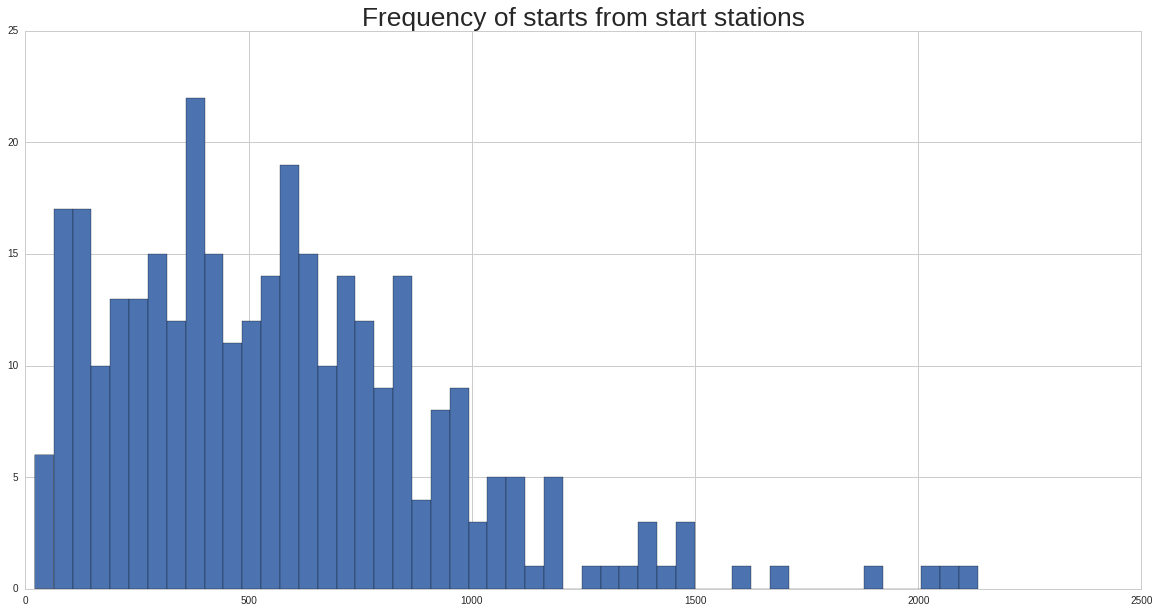

In [13]:
group_by_start = data.groupby(data.start_station_id, )
usage_freq = group_by_start.trip_time.count()
print('Amount of stations: ' + str(len(usage_freq)))
plt.hist(usage_freq, bins = 50)
plt.title('Frequency of starts from start stations')

We are not interested in the following features (they do not add any further information):

# Check for missing and false data:

In [14]:
data.isnull().sum()

trip_time             0
pickup_datetime       0
dropoff_datetime      0
start_station_id      0
start_station_name    0
pickup_latitude       0
pickup_longitude      0
end_station_id        0
end_station_name      0
dropoff_latitude      0
dropoff_longitude     0
bikeid                0
usertype              0
birth year            0
gender                0
dtype: int64

So there is not that much data missing. That's quite surprising, maybe it's wrong.

In [15]:
(data==0).sum()

trip_time                 0
pickup_datetime           0
dropoff_datetime          0
start_station_id          0
start_station_name        0
pickup_latitude           0
pickup_longitude          0
end_station_id            0
end_station_name          0
dropoff_latitude          0
dropoff_longitude         0
bikeid                    0
usertype                  0
birth year                0
gender                20495
dtype: int64

So we only have many zeros in the gender-feature. Flag them as NA to be consistent.

In [16]:
data = data.replace(np.float64(0), np.nan);

In [17]:
data.isnull().sum()

trip_time                 0
pickup_datetime           0
dropoff_datetime          0
start_station_id          0
start_station_name        0
pickup_latitude           0
pickup_longitude          0
end_station_id            0
end_station_name          0
dropoff_latitude          0
dropoff_longitude         0
bikeid                    0
usertype                  0
birth year                0
gender                20495
dtype: int64

Quick pverview about the trip_times

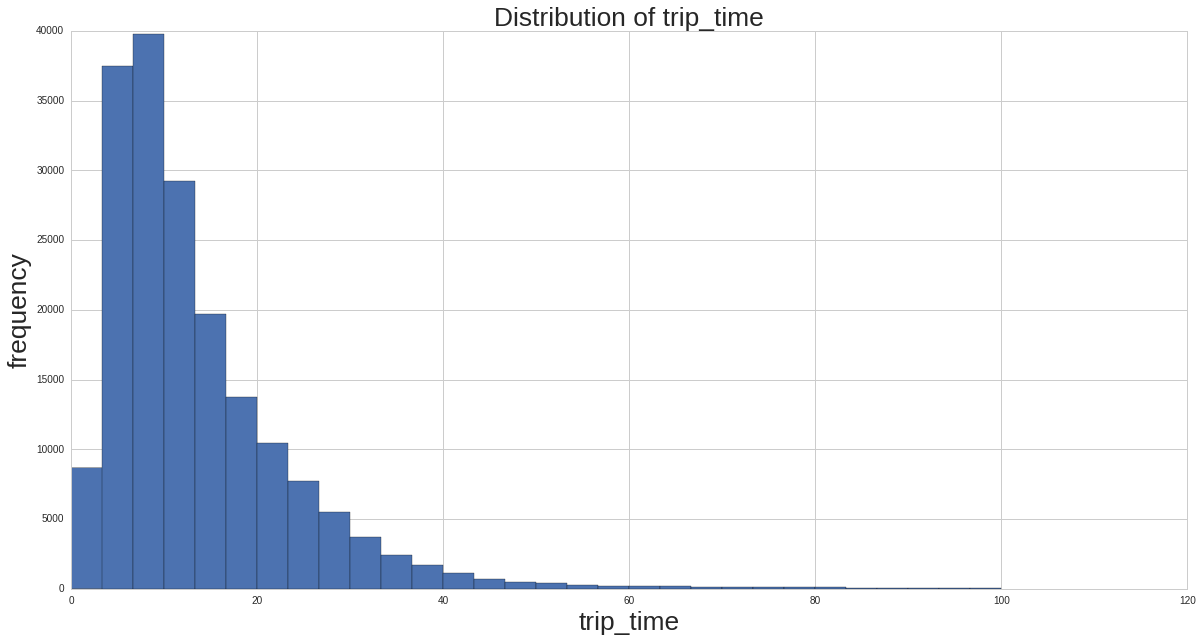

In [18]:
plt.hist((data['trip_time'] / np.timedelta64(1, 'm')), bins=30, range=[0, 100])
plt.title('Distribution of trip_time')
plt.xlabel('trip_time')
plt.ylabel('frequency')

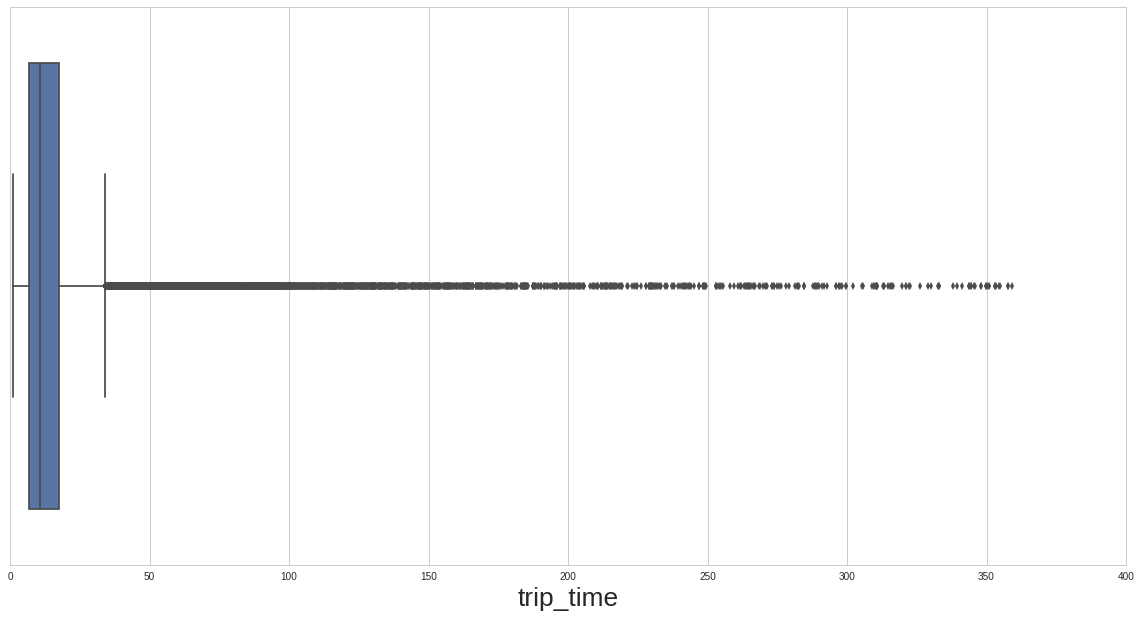

In [19]:
sns.boxplot((data['trip_time'] / np.timedelta64(1, 'm')))

So as we can see, we have many outliers.

In [20]:
data.trip_time.quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.01          00:01:59
0.05          00:03:25
0.10          00:04:25
0.25          00:06:41
0.50          00:10:40
0.75          00:17:39
0.90          00:26:54
0.95          00:33:56
0.99   01:08:57.570000
Name: trip_time, dtype: timedelta64[ns]

In [21]:
len(data.trip_time.value_counts().values)

5353

Identify the the cases without geo data and remove them from our data to be processed.

In [22]:
anomaly = data.loc[(data['dropoff_longitude'].isnull()) | (data['dropoff_latitude'].isnull()) | 
                       (data['pickup_longitude'].isnull()) | (data['pickup_latitude'].isnull())]
data = data.drop(anomaly.index)

In [23]:
anomaly['flag'] = 'geo_NA'

In [24]:
data.isnull().sum()

trip_time                 0
pickup_datetime           0
dropoff_datetime          0
start_station_id          0
start_station_name        0
pickup_latitude           0
pickup_longitude          0
end_station_id            0
end_station_name          0
dropoff_latitude          0
dropoff_longitude         0
bikeid                    0
usertype                  0
birth year                0
gender                20495
dtype: int64

So how many percent of data are left to be processed?

In [25]:
len(data)/(len(data)+len(anomaly))

1.0

In [26]:
anomaly.tail()

,trip_time,pickup_datetime,dropoff_datetime,start_station_id,start_station_name,pickup_latitude,pickup_longitude,end_station_id,end_station_name,dropoff_latitude,dropoff_longitude,bikeid,usertype,birth year,gender,flag


# <font color = 'blue'> So we only dropped 2% of the data because of missing geo tags. Someone could search the 'anomaly'-data for patterns, e.g. for fraud detection. We are also going to drop all the unrecognized trip_distances because we cannot (exactly) generate them (an approximation would be possible). </font color>

# Drop all the columns with trip_time.isnull()

(array([  1886.,  12429.,  23265.,  25474.,  22858.,  18987.,  14736.,
         11772.,   9414.,   7721.,   6635.,   5540.,   4620.,   3809.,
          3101.,   2403.,   1852.,   1427.,   1223.,    958.,    755.,
           558.,    395.,    337.,    307.,    247.,    231.,    180.,
           141.,    134.,    124.,    122.,    134.,     72.,     84.,
            67.,     79.,     63.,     59.,     71.,     61.,     59.,
            42.,     47.,     37.,     37.,     41.,     47.,     38.,
            43.]),
 array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
          18.,   20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,
          36.,   38.,   40.,   42.,   44.,   46.,   48.,   50.,   52.,
          54.,   56.,   58.,   60.,   62.,   64.,   66.,   68.,   70.,
          72.,   74.,   76.,   78.,   80.,   82.,   84.,   86.,   88.,
          90.,   92.,   94.,   96.,   98.,  100.]),
 <a list of 50 Patch objects>)

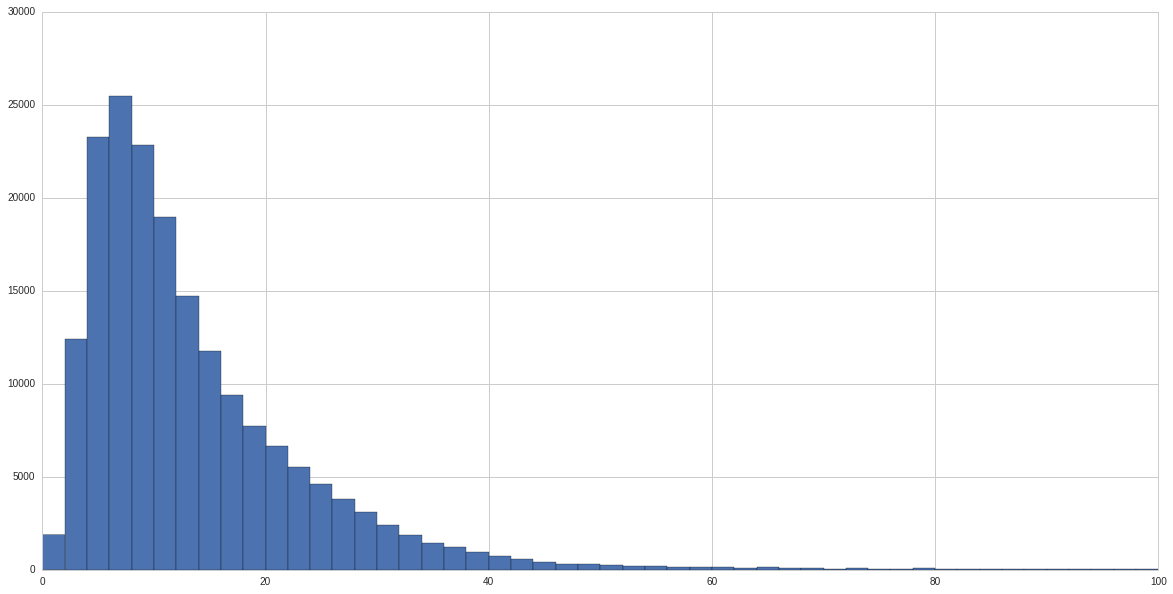

In [27]:
plt.hist(data.trip_time.values / np.timedelta64(1, 'm'), bins=50, range=[0,100])

# We sometimes have some unreasonably small trip_times.

# Start validating the data: Calculate the Manhattan-Distance

Calculate the distance of a trip. Use the difference of lon / lat data and parse it to metrics.

In [28]:
data['trip_dist'] = -1
#data['lat_diff'] = abs(data.pickup_latitude - data.dropoff_latitude)
#data['lon_diff'] = abs(data.pickup_longitude - data.dropoff_longitude)

In [37]:
# inpout for vincenty:(location.latitude, location.longitude)
from geopy.distance import vincenty
for i in range(0, (len(data)-1)):
    pickup = (data.iloc[i]['pickup_latitude'], data.iloc[i]['pickup_longitude'])
    dropoff = (data.iloc[i]['dropoff_latitude'], data.iloc[i]['dropoff_longitude'])
    data.set_value(i, 'trip_dist', vincenty(pickup,dropoff).meters)

# <font color = 'red'> This operation is way too slow! </font color>

In [38]:
data.trip_dist

0          876
1         4153
2          449
3         1630
4          529
5          760
6         1332
7         2297
8          689
9         1371
10        2358
11         558
12        4488
13        2146
14        2803
15        1291
16         446
17        1721
18        2882
19         674
20         927
21        3635
22        2168
23         887
24         810
25         706
26         810
27        1491
28        1003
29         935
          ... 
185714       0
185715     552
185716    2067
185717    1646
185718     535
185719     722
185720     366
185721     565
185722    1839
185723     809
185724       0
185725    1682
185726    1348
185727    1244
185728     739
185729    1314
185730    1154
185731    1694
185732    1896
185733    1061
185734    1208
185735     919
185736    1187
185737     285
185738     285
185739     831
185740     908
185741    1273
185742     906
185743      -1
Name: trip_dist, dtype: int64

In [39]:
data.columns

Index(['trip_time', 'pickup_datetime', 'dropoff_datetime', 'start_station_id',
       'start_station_name', 'pickup_latitude', 'pickup_longitude',
       'end_station_id', 'end_station_name', 'dropoff_latitude',
       'dropoff_longitude', 'bikeid', 'usertype', 'birth year', 'gender',
       'trip_dist'],
      dtype='object')

In [40]:
data.to_csv('data/bike_20140505_with_dist.csv')

In [45]:
data['avg_velocity'] = data.trip_dist.values/(data.trip_time / (np.timedelta64(1, 'h')))

In [47]:
data.avg_velocity = data.avg_velocity/1000

In [48]:
data.avg_velocity

0         10.912111
1         14.225309
2          6.820253
3         10.988764
4          6.925091
5          8.658228
6         12.787200
7         13.713433
8          9.119118
9          7.466868
10         7.867285
11         9.611483
12        10.785581
13         6.966276
14         9.628626
15        11.199036
16         9.122727
17        11.388971
18        13.963930
19         8.543662
20        13.565854
21        11.061708
22        11.086364
23         5.357718
24         9.112500
25         7.241026
26         9.286624
27         3.029120
28        13.035379
29         9.402235
            ...    
185714     0.000000
185715     4.445638
185716    11.554658
185717     8.417045
185718     8.754545
185719     6.203341
185720    11.870270
185721     6.647059
185722     8.631551
185723     8.321143
185724     0.000000
185725    12.883404
185726    11.637410
185727     8.514068
185728     6.964398
185729    13.751163
185730    12.861920
185731    11.818605
185732    11.376000


(array([  8.82000000e+03,   5.37300000e+03,   9.07400000e+03,
          1.76000000e+04,   3.17890000e+04,   4.10960000e+04,
          3.53930000e+04,   2.14280000e+04,   9.90700000e+03,
          3.74000000e+03,   1.16200000e+03,   2.77000000e+02,
          6.50000000e+01,   9.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([ -1.04956268e-02,   1.53099708e+00,   3.07248980e+00,
          4.61398251e+00,   6.15547522e+00,   7.69696793e+00,
          9.23846064e+00,   1.07799534e+01,   1.23214461e+01,
          1.38629388e+01,   1.54044315e+01,   1.69459242e+01,
          1.84874169e+01,   2.00289096e+01,   2.15704023e+01,
          2.31118950e+01,   2.46533878e+01,   2.61948805e+01,
      

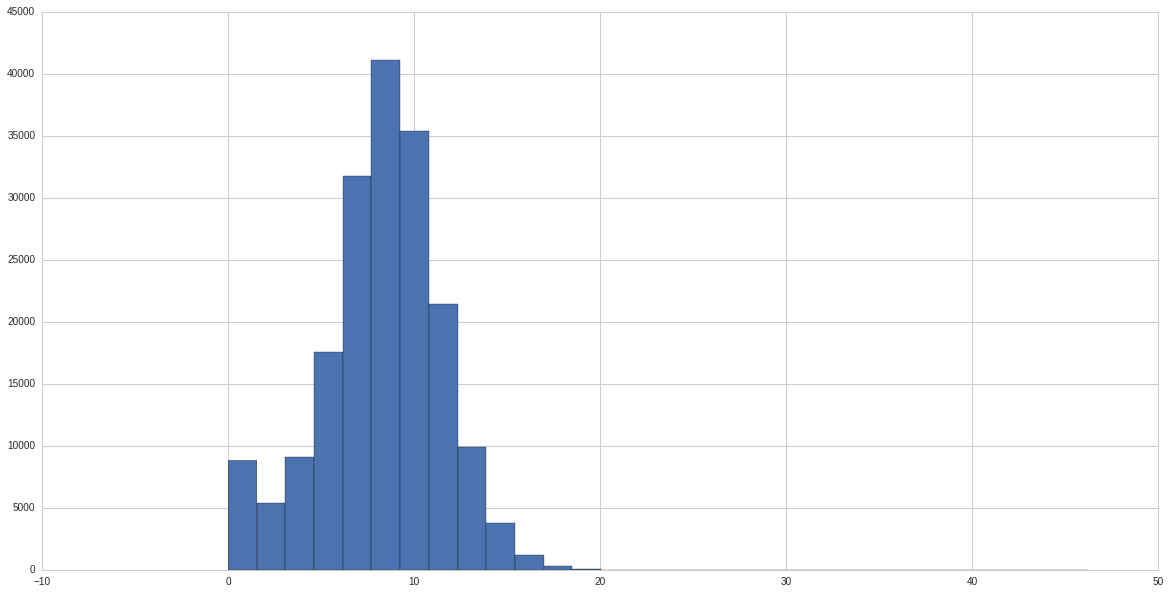

In [52]:
plt.hist(data.avg_velocity, bins=30)

In [54]:
data.avg_velocity.describe() # in km/h

count    185744.000000
mean          8.207375
std           3.224914
min          -0.010496
25%           6.484525
50%           8.457724
75%          10.292958
max          46.234286
Name: avg_velocity, dtype: float64

In [55]:
data.head()

,trip_time,pickup_datetime,dropoff_datetime,start_station_id,start_station_name,pickup_latitude,pickup_longitude,end_station_id,end_station_name,dropoff_latitude,dropoff_longitude,bikeid,usertype,birth year,gender,trip_dist,avg_velocity
0,00:04:49,2014-05-05 00:00:14,2014-05-05 00:05:03,495,W 47 St & 10 Ave,40.762699,-73.993012,469,Broadway & W 53 St,40.763441,-73.982681,17039,Subscriber,1986,1.0,876,10.912111
1,00:17:31,2014-05-05 00:00:19,2014-05-05 00:17:50,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,236,St Marks Pl & 2 Ave,40.728419,-73.987140,17875,Subscriber,1985,1.0,4153,14.225309
2,00:03:57,2014-05-05 00:01:05,2014-05-05 00:05:02,309,Murray St & West St,40.714979,-74.013012,3002,South End Ave & Liberty St,40.711512,-74.015756,18008,Customer,\N,NaN,449,6.820253
3,00:08:54,2014-05-05 00:01:12,2014-05-05 00:10:06,151,Cleveland Pl & Spring St,40.721816,-73.997203,345,W 13 St & 6 Ave,40.736494,-73.997044,18237,Subscriber,1983,1.0,1630,10.988764
4,00:04:35,2014-05-05 00:01:16,2014-05-05 00:05:51,173,Broadway & W 49 St,40.760647,-73.984427,449,W 52 St & 9 Ave,40.764618,-73.987895,16607,Subscriber,1985,1.0,529,6.925091


In [44]:
data.avg_amount_per_minute.quantile([.0001,.01, .5, .75, .95, .975, .99, .995])

0.0001    0.000000
0.0100    0.437318
0.5000    0.662983
0.7500    0.785714
0.9500    1.151163
0.9750    1.344677
0.9900    1.605263
0.9950    1.847222
Name: avg_amount_per_minute, dtype: float64

# Compare to http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml . We have a strict lower bound with .5 \$ per minute (taxi waiting in congestion). 1 \$ per minute match roughly 2 miles / minute (no static fares included!). So the taxi would drive 120 miles/minute.  

In [46]:
lb = 0.5
ub = 1
anomaly = anomaly.append(data.loc[(data['avg_amount_per_minute'] > ub) | (data['avg_amount_per_minute'] < lb)])
#anomaly.loc[
anomaly.loc[data.loc[(data['avg_amount_per_minute'] > ub)].index,'flag'] = 'too fast'
anomaly.loc[data.loc[(data['avg_amount_per_minute'] < lb)].index,'flag'] = 'too slow'
data = data.drop(anomaly.index, errors='ignore') # ignore uncontained labels / indices
print(1-len(data)/(len(data)+len(anomaly)))

0.14044941595051474


In [47]:
data.avg_amount_per_minute.describe()

count    3.038195e+06
mean     6.735544e-01
std      1.237572e-01
min      5.000000e-01
25%      5.769231e-01
50%      6.500000e-01
75%      7.500000e-01
max      1.000000e+00
Name: avg_amount_per_minute, dtype: float64

In [48]:
anomaly.tail()

,avg_amount_per_minute,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,flag,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,total_amount,trip_distance,trip_time
3534609,1.678322,2013-05-13 00:33:13,40.671968,-73.973026,58.5,too fast,1.0,2013-05-12 23:59:51,40.646834,-73.789637,11.9,71.4,21.9,00:33:22
3534611,1.061321,2013-05-13 00:06:56,40.772749,-73.955794,10.0,too fast,1.0,2013-05-12 23:59:52,40.743763,-73.985840,2.2,13.2,2.9,00:07:04
3534622,1.019417,2013-05-13 00:27:24,40.691357,-73.867019,30.5,too fast,1.0,2013-05-12 23:59:56,40.644692,-73.781850,NaN,31.5,8.9,00:27:28
3534627,1.374570,2013-05-13 00:14:31,40.825470,-73.953479,22.5,too fast,2.0,2013-05-12 23:59:58,40.744021,-73.999512,4.7,28.2,7.3,00:14:33
3534629,1.860283,2013-05-13 00:21:13,40.644504,-73.963537,42.0,too fast,1.0,2013-05-12 23:59:59,40.770077,-73.863887,8.6,51.6,15.6,00:21:14


# It's going on here.

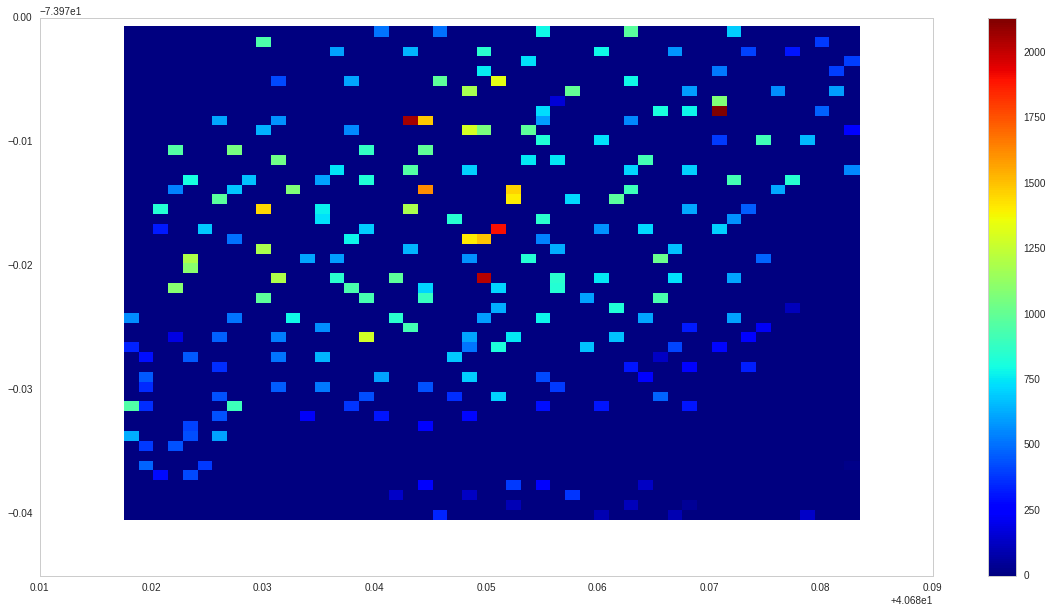

In [67]:
x = data.pickup_latitude
y = data.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=50, range=[ [x.quantile(.05), x.quantile(.95)], 
        [y.quantile(.05), y.quantile(.95)]], normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')

In [68]:
type(H)

numpy.ndarray

In [69]:
print(H.shape)
print(H.size)
print(H.max())

(50, 50)
2500
2133.0


In [70]:
print(xedges.shape)
xedges[0]

(51,)


40.69760127

In [71]:
print(xedges)
print(yedges)

[ 40.69760127  40.69891806  40.70023484  40.70155163  40.70286841
  40.7041852   40.70550199  40.70681877  40.70813556  40.70945235
  40.71076913  40.71208592  40.7134027   40.71471949  40.71603628
  40.71735306  40.71866985  40.71998664  40.72130342  40.72262021
  40.72393699  40.72525378  40.72657057  40.72788735  40.72920414
  40.73052093  40.73183771  40.7331545   40.73447128  40.73578807
  40.73710486  40.73842164  40.73973843  40.74105521  40.742372
  40.74368879  40.74500557  40.74632236  40.74763915  40.74895593
  40.75027272  40.7515895   40.75290629  40.75422308  40.75553986
  40.75685665  40.75817344  40.75949022  40.76080701  40.76212379
  40.76344058]
[-74.01043382 -74.00963903 -74.00884424 -74.00804945 -74.00725466
 -74.00645987 -74.00566508 -74.00487029 -74.0040755  -74.00328071
 -74.00248592 -74.00169113 -74.00089634 -74.00010155 -73.99930676
 -73.99851197 -73.99771718 -73.99692239 -73.9961276  -73.99533281
 -73.99453802 -73.99374323 -73.99294844 -73.99215365 -73.991358

In [72]:
from geopy.distance import vincenty
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(vincenty(newport_ri, cleveland_oh).kilometers)
#538.3904451566326

866.4554329011002


In [73]:
print('Current bin width:')
print(vincenty((xedges[0], yedges[0]), (xedges[1], yedges[1])).meters)

Current bin width:
160.91779879387767


In [74]:
distances = (-1)*np.ones(len(xedges)-1)
for x in range(0,len(xedges)-1, 1):
    distances[x] = vincenty((xedges[x], yedges[x]), (xedges[x+1], yedges[x+1])).meters

In [75]:
print('Sizes of all bins in meters:')
distances

Sizes of all bins in meters:


array([ 160.91779879,  160.91727705,  160.91675531,  160.91623356,
        160.91571181,  160.91519005,  160.91466829,  160.91414652,
        160.91362474,  160.91310296,  160.91258117,  160.91205938,
        160.91153758,  160.91101578,  160.91049397,  160.90997216,
        160.90945034,  160.90892851,  160.90840668,  160.90788485,
        160.90736301,  160.90684116,  160.90631931,  160.90579745,
        160.90527559,  160.90475372,  160.90423185,  160.90370997,
        160.90318808,  160.90266619,  160.9021443 ,  160.9016224 ,
        160.90110049,  160.90057858,  160.90005666,  160.89953474,
        160.89901281,  160.89849087,  160.89796894,  160.89744699,
        160.89692504,  160.89640309,  160.89588113,  160.89535916,
        160.89483719,  160.89431521,  160.89379323,  160.89327124,
        160.89274925,  160.89222725])

In [76]:
print(str(max(data.pickup_latitude)) +','+ str(max(data.pickup_longitude)))
print(str(max(data.dropoff_latitude)) +','+ str(max(data.dropoff_longitude)))

40.771522,-73.95380904
40.771522,-73.95380904


# Only look at trips in a given bounding box


In [77]:
jfk_geodata = (40.641547, -73.778118)
ridgefield_geodata = (40.856406, -74.020642)
data_in_box = data.loc[(data['dropoff_latitude'] > jfk_geodata[0]) & 
                       (data['dropoff_longitude'] < jfk_geodata[1]) &
                       (data['dropoff_latitude'] < ridgefield_geodata[0]) & 
                       (data['dropoff_longitude'] > ridgefield_geodata[1]) & 
                       (data['pickup_latitude'] > jfk_geodata[0]) & 
                       (data['pickup_longitude'] < jfk_geodata[1]) &
                       (data['pickup_latitude'] < ridgefield_geodata[0]) & 
                       (data['pickup_longitude'] > ridgefield_geodata[1])         
                       ]
# taxidata = taxidata.drop(anomaly.index)

<font color = 'red'> Be careful! They use negative (lat, long), not East/West! </font color>

In [78]:
data_in_box.head()

,trip_time,pickup_datetime,dropoff_datetime,start_station_id,start_station_name,pickup_latitude,pickup_longitude,end_station_id,end_station_name,dropoff_latitude,dropoff_longitude,bikeid,usertype,birth year,gender,trip_dist
0,00:04:49,2014-05-05 00:00:14,2014-05-05 00:05:03,495,W 47 St & 10 Ave,40.762699,-73.993012,469,Broadway & W 53 St,40.763441,-73.982681,17039,Subscriber,1986,1.0,0.011073
1,00:17:31,2014-05-05 00:00:19,2014-05-05 00:17:50,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,236,St Marks Pl & 2 Ave,40.728419,-73.987140,17875,Subscriber,1985,1.0,0.049403
2,00:03:57,2014-05-05 00:01:05,2014-05-05 00:05:02,309,Murray St & West St,40.714979,-74.013012,3002,South End Ave & Liberty St,40.711512,-74.015756,18008,Customer,\N,NaN,0.006211
3,00:08:54,2014-05-05 00:01:12,2014-05-05 00:10:06,151,Cleveland Pl & Spring St,40.721816,-73.997203,345,W 13 St & 6 Ave,40.736494,-73.997044,18237,Subscriber,1983,1.0,0.014838
4,00:04:35,2014-05-05 00:01:16,2014-05-05 00:05:51,173,Broadway & W 49 St,40.760647,-73.984427,449,W 52 St & 9 Ave,40.764618,-73.987895,16607,Subscriber,1985,1.0,0.007440


In [79]:
jfk_geodata < ridgefield_geodata
len(data_in_box)/len(data)

1.0

So all trips are in the given bounding box.

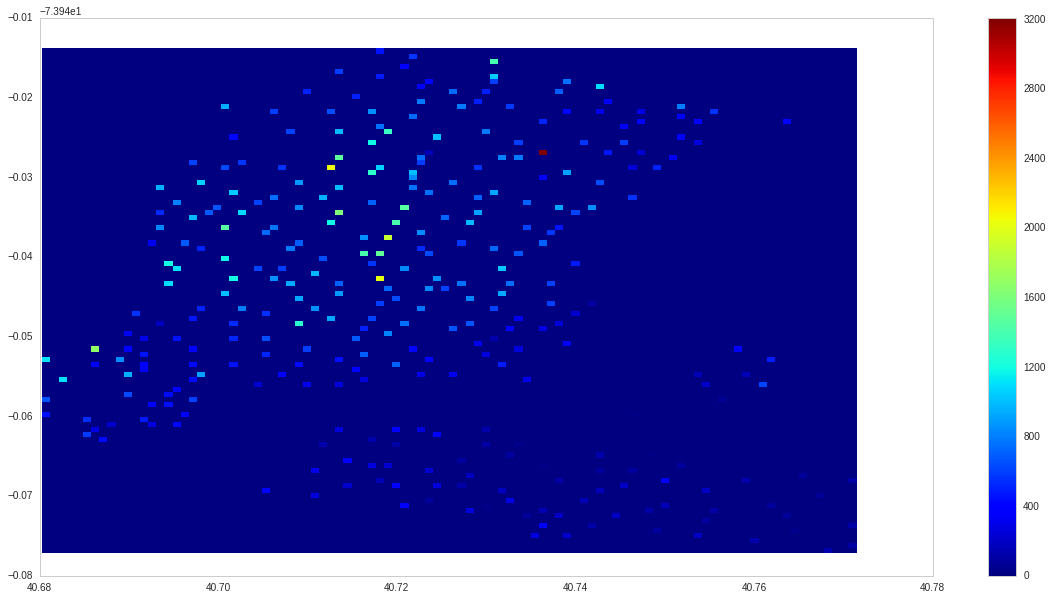

In [80]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')

In [81]:
print(H.shape)
print(H.size)
print(H.max())
print(xedges.shape)
print(xedges)
print(yedges)

distances = (-1)*np.ones(len(xedges)-1)
for x in range(0,len(xedges)-1, 1):
    distances[x] = vincenty((xedges[x], yedges[x]), (xedges[x+1], yedges[x+1])).meters
    
print('Sizes of all bins in meters:')
distances

(100, 100)
10000
3209.0
(101,)
[ 40.68034242  40.68125422  40.68216601  40.68307781  40.68398961
  40.6849014   40.6858132   40.68672499  40.68763679  40.68854858
  40.68946038  40.69037218  40.69128397  40.69219577  40.69310756
  40.69401936  40.69493116  40.69584295  40.69675475  40.69766654
  40.69857834  40.69949013  40.70040193  40.70131373  40.70222552
  40.70313732  40.70404911  40.70496091  40.7058727   40.7067845
  40.7076963   40.70860809  40.70951989  40.71043168  40.71134348
  40.71225527  40.71316707  40.71407887  40.71499066  40.71590246
  40.71681425  40.71772605  40.71863785  40.71954964  40.72046144
  40.72137323  40.72228503  40.72319682  40.72410862  40.72502042
  40.72593221  40.72684401  40.7277558   40.7286676   40.72957939
  40.73049119  40.73140299  40.73231478  40.73322658  40.73413837
  40.73505017  40.73596196  40.73687376  40.73778556  40.73869735
  40.73960915  40.74052094  40.74143274  40.74234454  40.74325633
  40.74416813  40.74507992  40.74599172  40.74

array([ 114.53451502,  114.53418823,  114.53386145,  114.53353466,
        114.53320787,  114.53288107,  114.53255428,  114.53222747,
        114.53190067,  114.53157387,  114.53124706,  114.53092025,
        114.53059344,  114.53026662,  114.52993981,  114.52961299,
        114.52928617,  114.52895934,  114.52863251,  114.52830568,
        114.52797885,  114.52765201,  114.52732518,  114.52699834,
        114.52667149,  114.52634465,  114.5260178 ,  114.52569095,
        114.52536409,  114.52503724,  114.52471038,  114.52438352,
        114.52405666,  114.52372979,  114.52340292,  114.52307605,
        114.52274918,  114.5224223 ,  114.52209542,  114.52176854,
        114.52144165,  114.52111477,  114.52078788,  114.52046099,
        114.52013409,  114.51980719,  114.5194803 ,  114.51915339,
        114.51882649,  114.51849958,  114.51817267,  114.51784576,
        114.51751884,  114.51719193,  114.51686501,  114.51653808,
        114.51621116,  114.51588423,  114.5155573 ,  114.51523

In [82]:
(H==0).sum()/H.size

0.96750000000000003

# So we know that about 97% of the bins have 0 pickups in it. This was expected, because we have static stations only.

## Let's take a first look at the distribution if the target variable which we want to estimate:

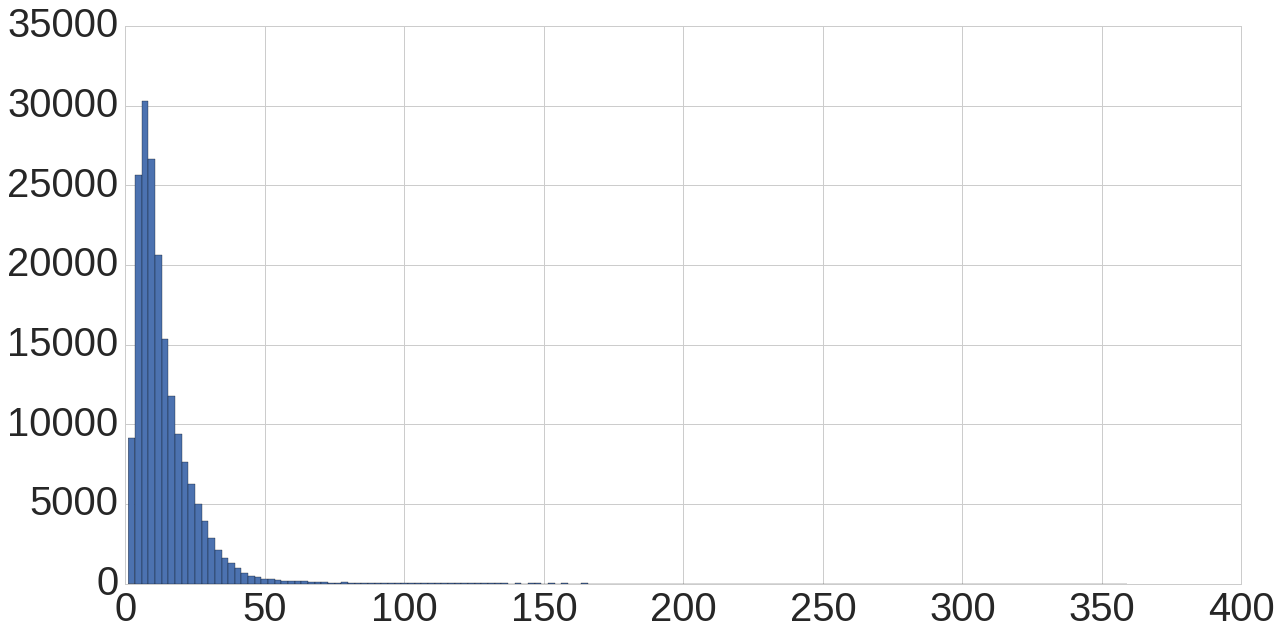

In [83]:
h = data_in_box.trip_time.values / np.timedelta64(1, 'm')
plt.figure(figsize=(20,10))
plt.hist(h, normed=False,  bins=150)
    #, histtype='stepfilled')
#plt.yscale('log')
#plt.ylabel('log(freq x)', fontsize=40)
#plt.xlabel('x = avg_amount_per_minute', fontsize=40)
#print('Min:' +  str(min(h)) + '\nMax:' +  str(max(h)))
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
#plt.locator_params(axis = 'x', nbins = 20)
plt.show()

In [84]:
data_in_box.head()

,trip_time,pickup_datetime,dropoff_datetime,start_station_id,start_station_name,pickup_latitude,pickup_longitude,end_station_id,end_station_name,dropoff_latitude,dropoff_longitude,bikeid,usertype,birth year,gender,trip_dist
0,00:04:49,2014-05-05 00:00:14,2014-05-05 00:05:03,495,W 47 St & 10 Ave,40.762699,-73.993012,469,Broadway & W 53 St,40.763441,-73.982681,17039,Subscriber,1986,1.0,0.011073
1,00:17:31,2014-05-05 00:00:19,2014-05-05 00:17:50,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,236,St Marks Pl & 2 Ave,40.728419,-73.987140,17875,Subscriber,1985,1.0,0.049403
2,00:03:57,2014-05-05 00:01:05,2014-05-05 00:05:02,309,Murray St & West St,40.714979,-74.013012,3002,South End Ave & Liberty St,40.711512,-74.015756,18008,Customer,\N,NaN,0.006211
3,00:08:54,2014-05-05 00:01:12,2014-05-05 00:10:06,151,Cleveland Pl & Spring St,40.721816,-73.997203,345,W 13 St & 6 Ave,40.736494,-73.997044,18237,Subscriber,1983,1.0,0.014838
4,00:04:35,2014-05-05 00:01:16,2014-05-05 00:05:51,173,Broadway & W 49 St,40.760647,-73.984427,449,W 52 St & 9 Ave,40.764618,-73.987895,16607,Subscriber,1985,1.0,0.007440


In [85]:
#data_in_box['pickup_datetime'].dt.dayofweek
#tdata_in_box['pickup_datetime'].dt.hourb
#data_in_box['pickup_datetime'].dt.month # year, month, day, hour, minute, second, microsecond, and tzinfo.
#data_in_box['pickup_datetime'].dt.day

# Make a new dataframe with features and targets

In [86]:
time_regression_df = pd.DataFrame([data_in_box['pickup_datetime'].dt.day,
                          data_in_box['pickup_datetime'].dt.dayofweek,
                          data_in_box['pickup_datetime'].dt.hour,
                          data_in_box['pickup_latitude'],
                          data_in_box['pickup_longitude'],
                          data_in_box['dropoff_latitude'],
                          data_in_box['dropoff_longitude'],
                          np.ceil(data_in_box['trip_time']/np.timedelta64(1, 'm')),
                         ]).T

In [87]:
time_regression_df.columns = ['pickup_datetime_day', 'pickup_datetime_dayofweek', 'pickup_datetime_hour',
                                 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
                                 'trip_time_in_mins']

Use minutes for prediction instead of seconds (ceil the time). Definitley more robust than seconds!

In [88]:
time_regression_df.tail()

,pickup_datetime_day,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time_in_mins
185739,11.0,6.0,23.0,40.732241,-74.000264,40.730287,-73.990765,7.0
185740,11.0,6.0,23.0,40.729170,-73.998102,40.721655,-74.002347,4.0
185741,11.0,6.0,23.0,40.734232,-73.986923,40.742909,-73.977061,6.0
185742,11.0,6.0,23.0,40.726281,-73.989780,40.722992,-73.979955,6.0
185743,11.0,6.0,23.0,40.726281,-73.989780,40.722992,-73.979955,6.0


In [89]:
time_regression_df.head()

,pickup_datetime_day,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time_in_mins
0,5.0,0.0,0.0,40.762699,-73.993012,40.763441,-73.982681,5.0
1,5.0,0.0,0.0,40.764397,-73.973715,40.728419,-73.987140,18.0
2,5.0,0.0,0.0,40.714979,-74.013012,40.711512,-74.015756,4.0
3,5.0,0.0,0.0,40.721816,-73.997203,40.736494,-73.997044,9.0
4,5.0,0.0,0.0,40.760647,-73.984427,40.764618,-73.987895,5.0


In [90]:
time_regression_df.ix[:,0:7].describe()

,pickup_datetime_day,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000,185744.000000
mean,7.799940,2.799940,14.236885,40.734630,-73.991079,40.734387,-73.991147
std,2.063868,2.063868,4.727856,0.019489,0.012186,0.019530,0.012298
min,5.000000,0.000000,0.000000,40.680342,-74.017134,40.680342,-74.017134
25%,6.000000,1.000000,11.000000,40.721655,-73.999947,40.721101,-74.000040
50%,7.000000,2.000000,15.000000,40.736494,-73.990765,40.736197,-73.990931
75%,10.000000,5.000000,18.000000,40.750073,-73.982050,40.749718,-73.982050
max,11.000000,6.000000,23.000000,40.771522,-73.953809,40.771522,-73.953809


In [91]:
print(time_regression_df.trip_time_in_mins.value_counts())
print(len(time_regression_df.trip_time_in_mins.value_counts()))

7.0      12846
8.0      12604
6.0      12364
9.0      11969
5.0      10954
10.0     10862
11.0      9997
12.0      8952
4.0       8049
13.0      7834
14.0      6901
15.0      6205
16.0      5535
17.0      4954
3.0       4500
18.0      4409
19.0      4076
20.0      3653
21.0      3418
22.0      3196
23.0      2819
24.0      2719
25.0      2400
26.0      2216
27.0      2010
2.0       1900
28.0      1804
29.0      1659
30.0      1428
31.0      1250
         ...  
277.0        1
303.0        1
262.0        1
227.0        1
228.0        1
209.0        1
235.0        1
241.0        1
208.0        1
246.0        1
200.0        1
253.0        1
259.0        1
260.0        1
261.0        1
268.0        1
299.0        1
270.0        1
272.0        1
273.0        1
275.0        1
276.0        1
279.0        1
280.0        1
288.0        1
292.0        1
293.0        1
296.0        1
297.0        1
360.0        1
Name: trip_time_in_mins, dtype: int64
313


So we hace 313 different times to predict.

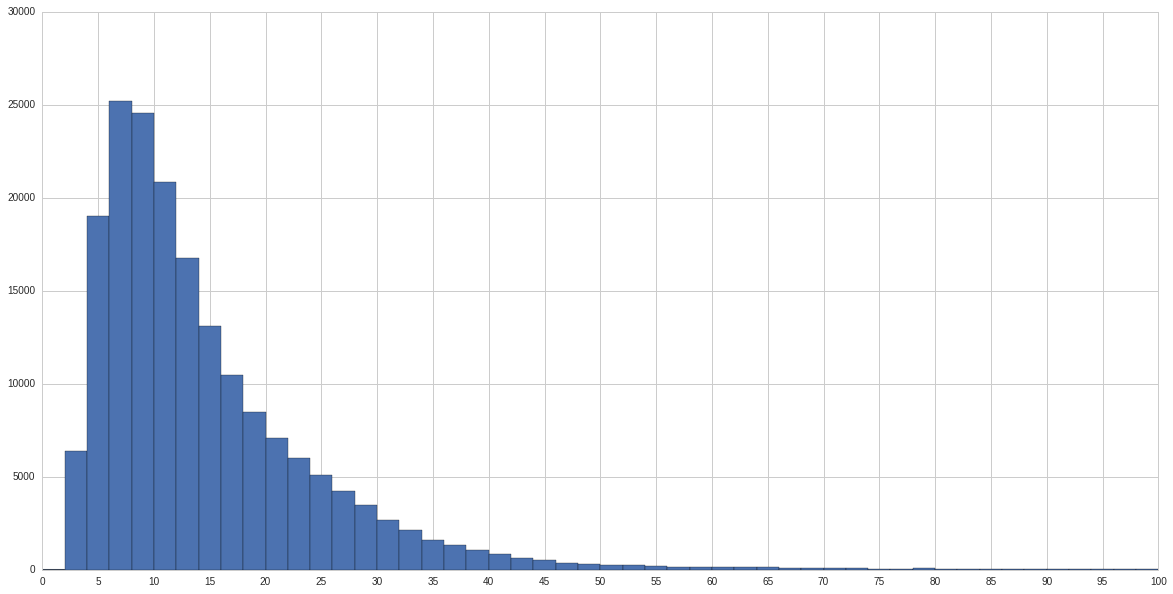

In [92]:
plt.hist(time_regression_df.trip_time_in_mins.values, bins=50, range = [0,100])
plt.locator_params(axis = 'x', nbins = 20)

As we see, most of the trips take between 2.5 and 35 minutes.

In [94]:
time_regression_df.trip_time_in_mins.quantile([0.05, 0.95])

0.05     4.0
0.95    34.0
Name: trip_time_in_mins, dtype: float64

# Split the data into a training dataset and a test dataset. Evaluate the performance of the decision tree on the test data

In [95]:
from sklearn import cross_validation as cv
y = time_regression_df["trip_time_in_mins"]
X = time_regression_df.ix[:,0:7]
X_train, X_test, y_train, y_test = cv.train_test_split(X, y,test_size=0.1,random_state=0) 

In [96]:
X_test.head()

,pickup_datetime_day,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
155336,10.0,5.0,20.0,40.748549,-73.988084,40.757570,-73.990985
24415,5.0,0.0,19.0,40.767272,-73.993929,40.762288,-73.983362
21085,5.0,0.0,18.0,40.759291,-73.988597,40.747659,-73.984907
40329,6.0,1.0,11.0,40.715338,-74.016584,40.719105,-73.999733
7066,5.0,0.0,9.0,40.743156,-73.974347,40.764397,-73.973715


In [97]:
y_test.head()

155336    10.0
24415     13.0
21085     11.0
40329     27.0
7066      30.0
Name: trip_time_in_mins, dtype: float64

In [98]:
Xy_test = pd.concat([X_test, y_test], axis=1)

In [99]:
Xy_test.head()

,pickup_datetime_day,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time_in_mins
155336,10.0,5.0,20.0,40.748549,-73.988084,40.757570,-73.990985,10.0
24415,5.0,0.0,19.0,40.767272,-73.993929,40.762288,-73.983362,13.0
21085,5.0,0.0,18.0,40.759291,-73.988597,40.747659,-73.984907,11.0
40329,6.0,1.0,11.0,40.715338,-74.016584,40.719105,-73.999733,27.0
7066,5.0,0.0,9.0,40.743156,-73.974347,40.764397,-73.973715,30.0


In [100]:
#Xy_test.to_csv('taxi_tree_test_Xy_20130506-12.csv')
#X_test.to_csv('taxi_tree_test_X_20130506-12.csv')
#y_test.to_csv('taxi_tree_test_y_20130506-12.csv')
Xy_test.to_csv('bike_tree_test_Xy_20140505-11.csv')
X_test.to_csv('bike_tree_test_X_20140505-11.csv')
y_test.to_csv('bike_tree_test_y_20140506-11.csv')

In [ ]:
# Xy_test_sample = Xy_test.sample(10000, random_state=99)

In [ ]:
# Xy_test_sample.to_csv('taxi_tree_test_Xy_sample.csv')

In [ ]:
# Xy_test_sample.head()

In [101]:
print(X_train.shape)
print(X_train.size)
print(X_test.shape)
print(X.shape)
print(X_train.shape[0]+X_test.shape[0])

(167169, 7)
1170183
(18575, 7)
(185744, 7)
185744


In [112]:
import time
t = time.time()

In [113]:
print(__doc__)

# Import the necessary modules and libraries
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

#features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','pickup_datetime']
#print("* features:", features, sep="\n")


regtree = DecisionTreeRegressor(min_samples_split=3, random_state=99, max_depth=8)# formerly 15. 15 is reasonable
                                                                                     # random states: 99
regtree.fit(X_train, y_train)




Automatically created module for IPython interactive environment


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, presort=False, random_state=99,
           splitter='best')

In [114]:
elapsed = time.time() - t
print(elapsed)

0.793353796005249


In [115]:
regtree.score(X_test, y_test)

0.12864331323745493

In [174]:
from sklearn import tree
tree.export_graphviz(regtree, out_file='figures/tree_d30.dot', feature_names=time_regression_df.ix[:,0:7].columns, class_names=time_regression_df.columns[7])    

KeyboardInterrupt: 

In [149]:
print(regtree.tree_.feature)
print(regtree.tree_.children_left)
print(regtree.tree_.children_right)

[ 4  6  5 ..., -2 -2 -2]
[ 1  2  3 ..., -1 -1 -1]
[15818 12497  6154 ...,    -1    -1    -1]


Prepare a dictionary to look uop the features that are splitted in the nodes

In [150]:
feature_dict = {}
for i in range(0,7):
    feature_dict[i] = time_regression_df.ix[:,i].name
print(feature_dict)

{0: 'pickup_datetime_day', 1: 'pickup_datetime_dayofweek', 2: 'pickup_datetime_hour', 3: 'pickup_latitude', 4: 'pickup_longitude', 5: 'dropoff_latitude', 6: 'dropoff_longitude'}


In [97]:
feature_splits = list(regtree.tree_.feature)
for i in range(0,len(regtree.tree_.feature)):
    if feature_splits[i] >= 0:
        feature_splits[i] = feature_dict[feature_splits[i]]

In [98]:
print(feature_splits)
print(regtree.tree_.threshold)

['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude', 'pickup_latitude', 'dropoff_longitude', 'pickup_longitude', 'dropoff_latitude', 'pickup_latitude', 'dropoff_latitude', -2, -2, 'dropoff_latitude', -2, -2, 'pickup_longitude', 'dropoff_longitude', -2, -2, 'pickup_latitude', -2, -2, 'dropoff_longitude', 'pickup_longitude', 'pickup_datetime_hour', -2, -2, 'pickup_datetime_day', -2, -2, 'dropoff_latitude', 'pickup_latitude', -2, -2, 'pickup_latitude', -2, -2, 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude', -2, -2, 'dropoff_longitude', -2, -2, 'dropoff_longitude', 'pickup_datetime_hour', -2, -2, 'pickup_datetime_hour', -2, -2, 'pickup_latitude', 'dropoff_longitude', 'pickup_latitude', -2, -2, 'pickup_longitude', -2, -2, 'dropoff_latitude', 'dropoff_latitude', -2, -2, 'dropoff_longitude', -2, -2, 'dropoff_latitude', 'dropoff_latitude', 'dropoff_longitude', 'pickup_datetime_hour', 'dropoff_latitude', -2, -2, 'dropoff_latitude', -2,

In [99]:
# from http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print( "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print( "} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print( "return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [100]:
# from http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code_matrix(tree, feature_names):
        decision_list = []
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
        #frame =  pd.DataFrame(np.nan, columns=['leaf_no', range(1,tree.tree_.max_depth), 'value'])

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        decision_list.append({str(features[node]):threshold[node]})
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        decision_list.append({'back': -1})
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        decision_list.append({'back': -1})
                else:
                        decision_list.append({'leaf_val':value[node][0][0]})

        recurse(left, right, threshold, features, 0) # root node
        return decision_list

In [101]:
a = get_code_matrix(regtree, feature_names=time_regression_df.ix[:,0:7].columns)

In [102]:
a[0:20]

[{'pickup_longitude': -73.886093139648438},
 {'dropoff_longitude': -73.876411437988281},
 {'dropoff_latitude': 40.711517333984375},
 {'pickup_latitude': 40.735557556152344},
 {'pickup_latitude': 40.721664428710938},
 {'dropoff_longitude': -73.984504699707031},
 {'pickup_longitude': -73.966636657714844},
 {'dropoff_latitude': 40.701427459716797},
 {'pickup_latitude': 40.703460693359375},
 {'dropoff_latitude': 40.652553558349609},
 {'leaf_val': 13.16988416988417},
 {'back': -1},
 {'leaf_val': 8.0531899219095333},
 {'back': -1},
 {'back': -1},
 {'dropoff_latitude': 40.679161071777344},
 {'leaf_val': 19.431952662721894},
 {'back': -1},
 {'leaf_val': 13.591245376078914},
 {'back': -1}]

In [103]:
len(a)

3213

In [104]:
a[0:20]

[{'pickup_longitude': -73.886093139648438},
 {'dropoff_longitude': -73.876411437988281},
 {'dropoff_latitude': 40.711517333984375},
 {'pickup_latitude': 40.735557556152344},
 {'pickup_latitude': 40.721664428710938},
 {'dropoff_longitude': -73.984504699707031},
 {'pickup_longitude': -73.966636657714844},
 {'dropoff_latitude': 40.701427459716797},
 {'pickup_latitude': 40.703460693359375},
 {'dropoff_latitude': 40.652553558349609},
 {'leaf_val': 13.16988416988417},
 {'back': -1},
 {'leaf_val': 8.0531899219095333},
 {'back': -1},
 {'back': -1},
 {'dropoff_latitude': 40.679161071777344},
 {'leaf_val': 19.431952662721894},
 {'back': -1},
 {'leaf_val': 13.591245376078914},
 {'back': -1}]

In [105]:
decisions = np.ndarray(shape=(2**regtree.tree_.max_depth, 2*regtree.tree_.max_depth+2), dtype = '<U30')

In [106]:
m = 0
n = 0
for i in range(0,len(a)):
    if (list(a[i].values()) != [-1]):
        #print(n)
        #print(i)
        #print('if')
        #print(list(a[i].keys()) == ['leaf_val'])
        #print(decisions[m,n])
        decisions[m,2*n] = list(a[i].keys())[0]
        decisions[m,2*n+1] = list(a[i].values())[0]
        n = n+1
        #print(n)
    if (list(a[i].keys()) == ['leaf_val']):
        #print('elif')
        m = m+1
        #print(n)
    elif(list(a[i].values()) == [-1]):
        #print('else')
        n = n-1
    #print(n,m)

In [107]:
decisions

array([['pickup_longitude', '-73.8860931396', 'dropoff_longitude', ...,
        '40.6525535583', 'leaf_val', '13.1698841699'],
       ['', '', '', ..., '', 'leaf_val', '8.05318992191'],
       ['', '', '', ..., '40.6791610718', 'leaf_val', '19.4319526627'],
       ..., 
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', '']], 
      dtype='<U30')

In [108]:
np.savetxt('decisions.txt', decisions, fmt='%s', delimiter=',')

# decisions.nonzero(): Try somehow to replace the 'None'-values with 'same' or something like that

In [109]:
decisions

array([['pickup_longitude', '-73.8860931396', 'dropoff_longitude', ...,
        '40.6525535583', 'leaf_val', '13.1698841699'],
       ['', '', '', ..., '', 'leaf_val', '8.05318992191'],
       ['', '', '', ..., '40.6791610718', 'leaf_val', '19.4319526627'],
       ..., 
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', '']], 
      dtype='<U30')

In [176]:
t = time.time()

In [177]:
from sklearn.ensemble import RandomForestRegressor

rd_regtree = RandomForestRegressor(n_estimators=20,n_jobs=6,min_samples_split=3, random_state=99, max_depth=30) 
#total sum of diff: 1132
#rd_regtree = RandomForestRegressor(n_estimators=40,n_jobs=-1,min_samples_split=3, random_state=99, max_depth=11)
#total sum of diff: 1129
rd_regtree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=6, oob_score=False, random_state=99,
           verbose=0, warm_start=False)

In [178]:
elapsed_rd_regtree = time.time() - t
print(elapsed_rd_regtree)

133.57636427879333


In [179]:
print(rd_regtree.score(X_test, y_test))

0.786676093283


Perzentile(%):  [1, 5, 10, 15, 25, 50, 75, 90, 95, 99] 
 [-51.36266497 -15.03176635  -9.03176635  -5.644375    -2.03176635
   2.46251923   5.69875679   8.21071429   9.69875679  15.28441777]
Absolute time deviation (in 1k):  128.49055269


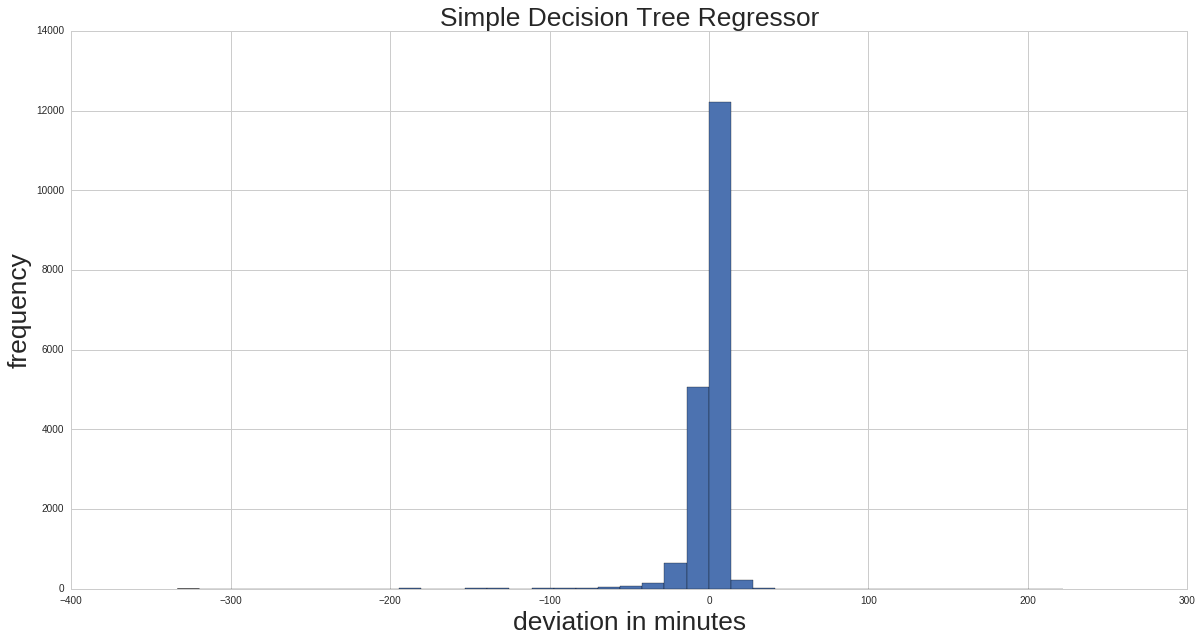

In [116]:
y_pred = regtree.predict(X_test)
np.linalg.norm(np.ceil(y_pred)-y_test)
diff = (y_pred-y_test)
# plt.figure(figsize=(12,10)) # not needed. set values globally
plt.hist(diff.values, bins=40)
print('Perzentile(%): ', [1,5,10,15,25,50,75,90,95,99], '\n', np.percentile(diff.values, [1,5,10,15,25,50,75,90,95,99]))
print('Absolute time deviation (in 1k): ', sum(abs(diff))/1000)
plt.title('Simple Decision Tree Regressor')
plt.xlabel('deviation in minutes')
plt.ylabel('frequency')

In [181]:
from sklearn.externals import joblib
joblib.dump(regtree, 'treelib/regtree_depth_30_PY27.pkl', protocol=2) 

['treelib/regtree_depth_30_PY27.pkl',
 'treelib/regtree_depth_30_PY27.pkl_01.npy',
 'treelib/regtree_depth_30_PY27.pkl_02.npy',
 'treelib/regtree_depth_30_PY27.pkl_03.npy']

In [182]:
regtree.tree_.max_depth

30

Perzentile(%):  [1, 5, 10, 15, 25, 50, 75, 90, 95, 99] 
 [-13.  -6.  -4.  -2.  -1.   1.   3.   4.   6.  10.]
Absolute time deviation (in 1k):  828.733


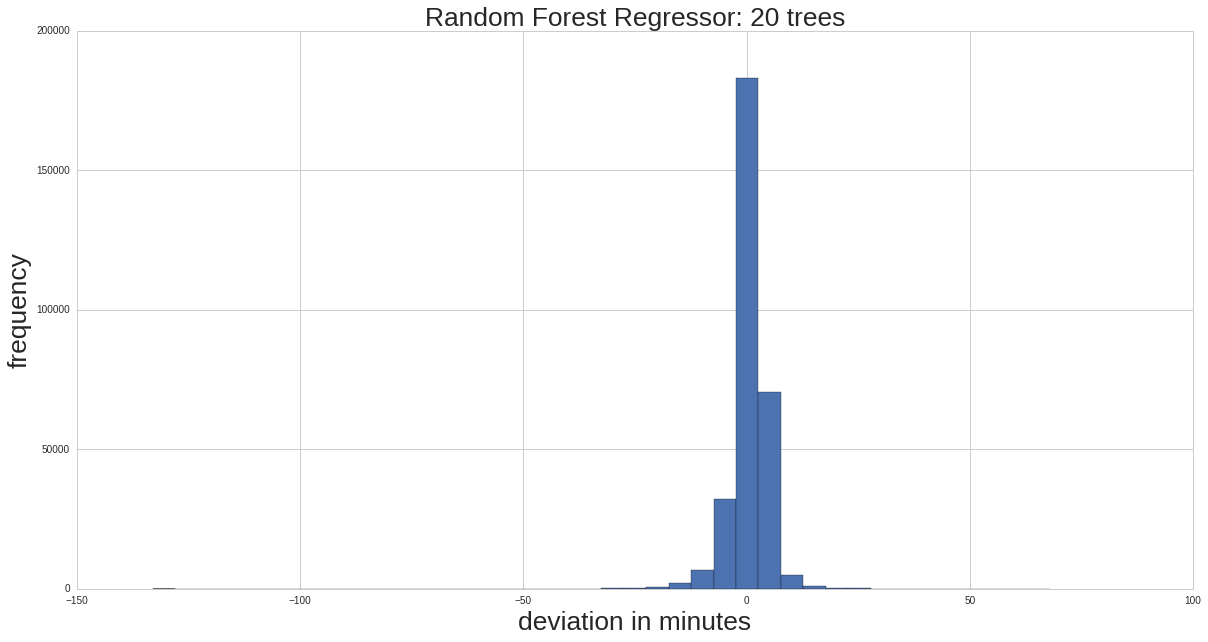

In [183]:
percentiles = [1,5,10,15,25,50,75,90,95,99]
y_pred = rd_regtree.predict(X_test)
np.linalg.norm(y_pred-y_test)
diff = (np.ceil(y_pred)-y_test)
#plt.figure(figsize=(12,10))
plt.hist(diff.values, bins=40)
print('Perzentile(%): ', percentiles , '\n', np.percentile(diff.values, percentiles))
print('Absolute time deviation (in 1k): ', sum(abs(diff))/1000)
plt.title('Random Forest Regressor: 20 trees')
plt.xlabel('deviation in minutes')
plt.ylabel('frequency')

In [184]:
from sklearn.externals import joblib
joblib.dump(rd_regtree, 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl', protocol=2)

['randforlib/regtree_20x_depth_30_PY27.pkl.pkl',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_01.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_02.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_03.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_04.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_05.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_06.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_07.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_08.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_09.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_10.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_11.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_12.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_13.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_14.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_15.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_16.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_17.npy',

In [186]:
! cd randforlib && zip regtree_20x_depth_30.zip regtree_20x_depth_30_PY27.pkl.pkl*

updating: regtree_20x_depth_30_PY27.pkl.pkl (deflated 72%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_01.npy (deflated 19%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_02.npy (deflated 81%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_03.npy (deflated 70%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_04.npy (deflated 19%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_05.npy (deflated 81%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_06.npy (deflated 70%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_07.npy (deflated 19%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_08.npy (deflated 81%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_09.npy (deflated 70%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_10.npy (deflated 19%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_11.npy (deflated 81%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_12.npy (deflated 70%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_13.npy (deflated 19%)
updating: regtree_20x_depth_30_PY27.pkl.pkl_14.npy (deflated 81%)
updating: regtree

## Read as follows: Split # x results in the children_left[x] and children_right[x], etc. Means: go to the left, and then step by step to the right...

In [130]:
print('cleft: ' + str(regtree.tree_.children_left) + '\n\n', #array of left children
      'cright: ' + str(regtree.tree_.children_right) + '\n\n', #array of right children
    regtree.tree_.feature, '\n\n',#array of nodes splitting feature
    regtree.tree_.threshold, '\n\n', #array of nodes splitting points
    #regtree.tree_.value
     ) #array of nodes values

cleft: [   1    2    3 ..., 1605   -1   -1]

 cright: [ 894  507  254 ..., 1606   -1   -1]

 [ 4  6  5 ...,  5 -2 -2] 

 [-73.88609314 -73.87641144  40.71151733 ...,  40.83932495  -2.          -2.        ] 




numpy.ndarray(regtree.tree_.children_left #array of left children
regtree.tree_.children_right #array of right children
regtree.tree_.feature #array of nodes splitting feature
regtree.tree_.threshold #array of nodes splitting points
regtree.tree_.value #array of nodes values

## Finding leaves:

In [131]:
leaves = regtree.tree_.children_left*regtree.tree_.children_right
for idx, a in enumerate(leaves):
    if a==1:
        x=1# do nothing
    else:
        leaves[idx] = 0
print(leaves)

[0 0 0 ..., 0 1 1]


## Now we've found the leaves

In [132]:
regtree.tree_.compute_feature_importances()

array([ 0.00201552,  0.02067813,  0.05331978,  0.17284459,  0.30449187,
        0.13772981,  0.3089203 ])

# Seems that the first 3 features are quite irrelevant right now...

In [133]:
splits = regtree.tree_.threshold

[  7.5  10.5   5.5   5.5   7.5   9.5  20.5   9.5  17.5   6.5   7.5  17.5
  10.5   6.5  17.5   6.5   7.5   6.5  17.5   6.5   5.5   7.5   6.5   6.5
  17.5  10.5   7.5   7.5   7.5   6.5  19.5   6.5   6.5  17.5   7.5   6.5
   6.5   6.5  18.5  18.5   6.5  10.5   5.5   5.5   7.5  19.5  18.5   4.5
  11.5   6.5  17.5   6.5   9.5   7.5   8.5   9.5   0.5  19.   14.5   4.5
  17.5   9.5   6.5  17.5   2.5  20.5   6.5  18.5   3.5  14.5  20.5   4.5
  14.   20.    9.5   2.5  17.5  15.5  11.   13.5  12.5   8.5   2.    1.5
  10.5  16.5   6.5  14.5   4.5  14.5  11.5  17.5   4.5   7.5  17.5  10.5
   7.5  19.   17.   13.5   8.5  18.5  19.5  12.5   8.5  15.5  14.5  22.5
   7.5   3.5  13.5   4.5   1.5   9.5   6.5   3.5   6.5   3.5   8.5   6.5
   9.5   8.5   6.5   7.5   0.5   5.5   8.5  10.5  17.5   3.5  16.5  14.5
  11.5   3.5   2.5  11.5  18.5  10.5   4.5   6.5  19.5  22.5  19.5  15.5
  21.   13.5   7.5  13.5  13.5   6.5  14.5  17.5  12.5   5.   10.5   7.5
  10.5   3.5   4.5  18.5   7.5   4.5   5.5   3.   2

(array([ 10.,  21.,  36.,  27.,  22.,  18.,  12.,  20.,  19.,  10.]),
 array([  0.5,   2.7,   4.9,   7.1,   9.3,  11.5,  13.7,  15.9,  18.1,
         20.3,  22.5]),
 <a list of 10 Patch objects>)

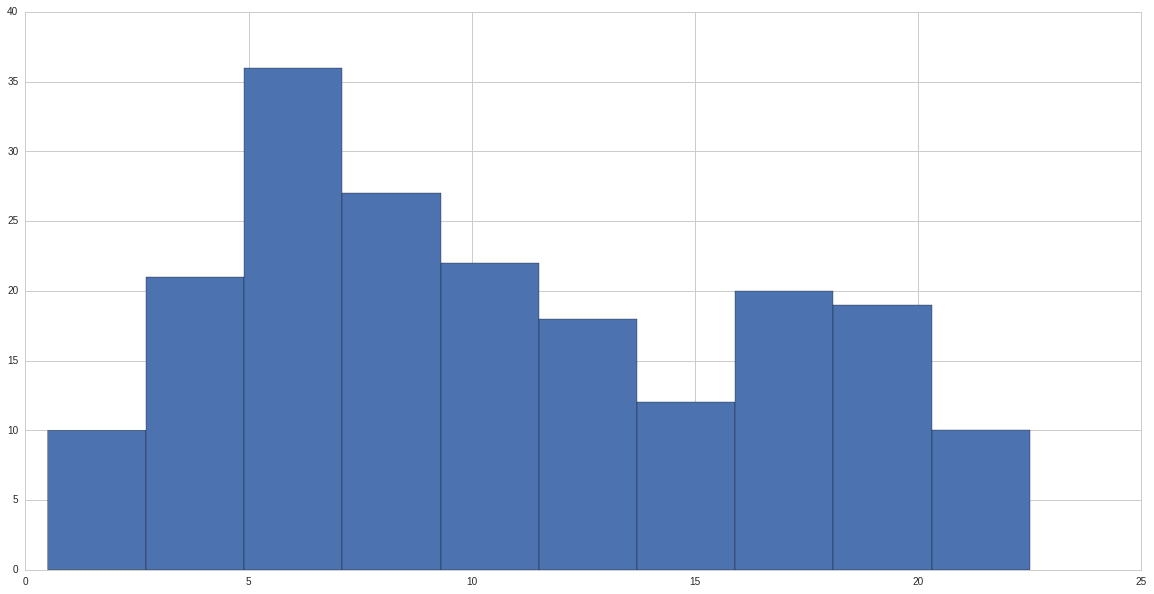

In [134]:
time_splits = splits[(splits>=0) & (splits<=24)]
print(time_splits)
plt.hist(time_splits)

# Where are splits in the hour?

# Filter the splits in longitudinal and latitudinal data

In [135]:
long_splits = splits[(splits>=-75) & (splits<=-70)]
lat_splits = splits[(splits>=40) & (splits<=41)]

# <font color = 'red'> The MSE of each node is stored in the 'impurity'-property. </font color>

In [136]:
#np.multiply(regtree.tree_.value, 1/ regtree.tree_.n_node_samples).size
avg_time_dev = regtree.tree_.impurity.T  * leaves
#avg_time_dev = (np.array(regtree.tree_.value)/np.array(regtree.tree_.n_node_samples)) *np.array(leaves)
avg_time_dev = avg_time_dev[avg_time_dev!=0]

In [137]:
avg_time_dev

array([  2.98089772e+01,   2.39769852e+01,   3.13388607e+01,
         2.25332896e+01,   2.22804048e+01,   2.99869810e+01,
         3.83369750e+01,   2.07098672e+01,   2.49863999e+01,
         3.77843762e+01,   3.68750000e+00,   1.60710059e+01,
         1.53722751e+01,   2.27125283e+01,   2.16740895e+01,
         1.81328277e+01,   2.32361592e+01,   2.88596873e+01,
         2.24318451e+01,   3.06682575e+01,   4.13069070e+01,
         4.40175256e+01,   2.16962707e+01,   5.83257618e+01,
         2.71539050e+01,   3.55195072e+01,   3.75072676e+01,
         3.25642177e+01,   2.99232070e+01,   2.76129658e+01,
         1.57879788e+01,   4.18594231e+01,   4.21534048e+01,
         2.20587055e+01,   3.48223561e+01,   3.56734211e+01,
         3.61657643e+01,   2.69355102e+01,   9.62162162e+01,
         6.51634349e+01,   2.21484900e+01,   2.22534582e+01,
         4.93639922e+01,   2.61742245e+01,   3.18070081e+01,
         5.54020911e+01,   1.63907765e+01,   1.34724911e+01,
         1.03401265e+01,

In [138]:
regtree.tree_.compute_feature_importances()

array([ 0.00201552,  0.02067813,  0.05331978,  0.17284459,  0.30449187,
        0.13772981,  0.3089203 ])

(array([  87.,   63.,  108.,   87.,   60.,   50.,   26.,   35.,   33.,
          20.,   16.,   13.,   13.,   13.,    4.,    3.,    7.,    2.,
           7.,    5.,    4.,    2.,    3.,    1.,    3.,    2.,    3.,
           1.,    1.,    2.,    3.,    1.,    2.,    2.,    0.,    1.,
           1.,    1.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,
           0.,    0.,    1.,    1.,    0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.]),
 <a list of 50 Patch objects>)

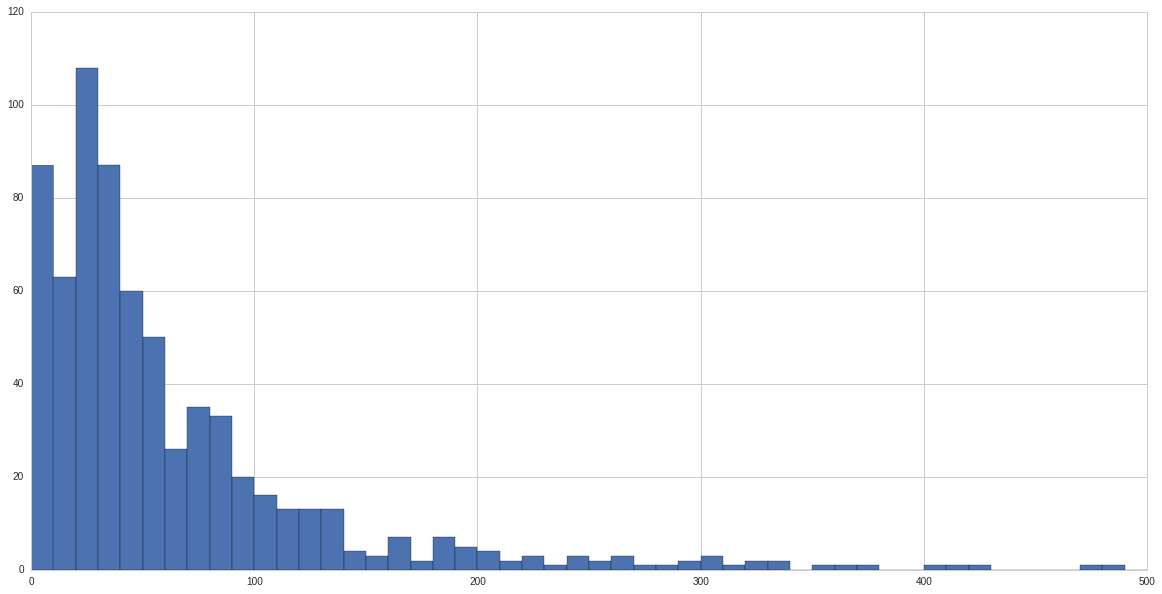

In [139]:
h = avg_time_dev
plt.hist(h.tolist(), bins=50, range=[0, 500])

In [140]:
np.percentile(avg_time_dev, q=[5, 50, 75, 90, 95, 97.5, 99])

array([   2.25      ,   40.40453686,   80.65816075,  144.65208316,
        233.20489438,  328.16237289,  488.59704894])

In [142]:
time_regression_df.columns[0:7]

Index(['pickup_datetime_day', 'pickup_datetime_dayofweek',
       'pickup_datetime_hour', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude'],
      dtype='object')

# <font color = 'blue'> Now we want to visualize the decision tree. To do so, plot the splits in geodata on the map of NYC (together with the heat map) </font color>

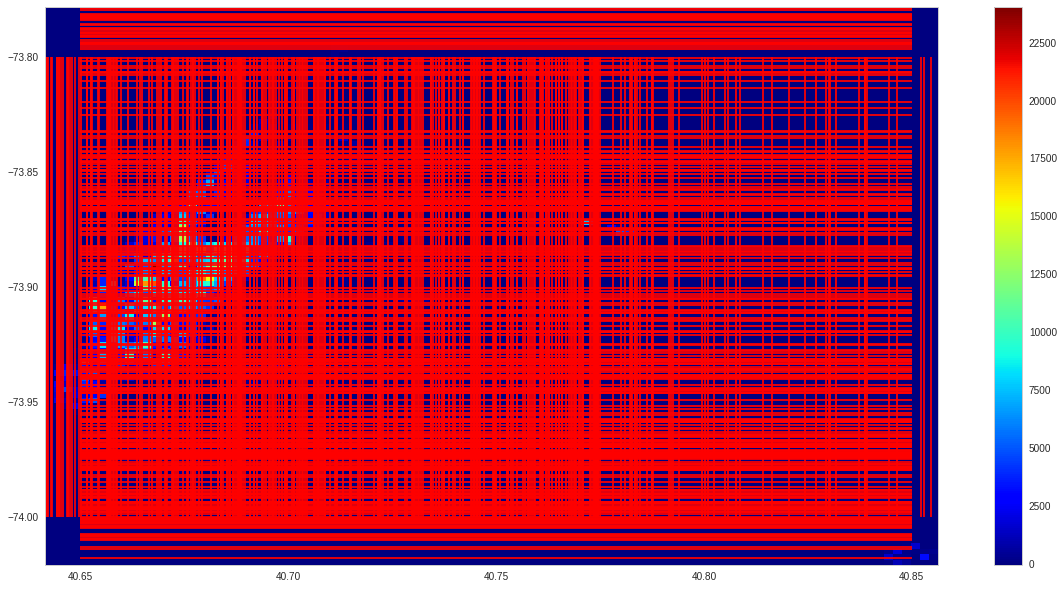

In [143]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')

## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.eventplot(lat_splits, orientation='horizontal', lineoffsets=-73.9,
          linelengths=0.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.eventplot(long_splits, orientation='vertical', lineoffsets=40.75,
          linelengths=.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.axis([xedges.min(),xedges.max(),yedges.min(),yedges.max()]) # zoom in
plt.hold(False)